In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("../../data/external/final2014_output_dataset_update.csv")
df

,Unnamed: 0,gpslat,gpslon,Extreme intra-period,Mean temperature,Diurnal temperature,Sum rainfall in Jun(mm),Sum rainfall Jun_to_Nov_(mm),rain_coef_of_var
0,0,15.02,-17.030001,18.07,27.173420,5.347186,0.345417,5.464583,5.628123
1,1,15.02,-16.930000,21.56,27.416781,7.402964,0.420417,6.319167,5.580527
2,2,15.02,-16.830000,25.53,27.682603,9.520659,0.471250,7.124167,5.696689
3,3,15.02,-16.730000,28.92,27.929826,11.395868,0.512500,7.846667,5.874703
4,4,15.02,-16.629999,29.93,28.102682,12.245509,0.510833,8.244583,5.860745
...,...,...,...,...,...,...,...,...,...
1648,295,15.02,-12.930000,29.24,30.435523,12.105299,2.182500,8.517917,6.723689
1649,296,15.02,-12.830000,29.18,30.544453,12.075689,2.258750,8.229583,6.765548
1650,297,15.02,-12.730000,29.10,30.654472,12.051048,2.318750,7.916667,6.872024
1651,298,15.02,-12.630000,28.95,30.769216,12.001078,2.321250,7.531667,6.496414


In [4]:
df_useful_data = df.drop(columns=["Unnamed: 0", "gpslat", "gpslon"], axis=1)

In [5]:
df_useful_data

,Extreme intra-period,Mean temperature,Diurnal temperature,Sum rainfall in Jun(mm),Sum rainfall Jun_to_Nov_(mm),rain_coef_of_var
0,18.07,27.173420,5.347186,0.345417,5.464583,5.628123
1,21.56,27.416781,7.402964,0.420417,6.319167,5.580527
2,25.53,27.682603,9.520659,0.471250,7.124167,5.696689
3,28.92,27.929826,11.395868,0.512500,7.846667,5.874703
4,29.93,28.102682,12.245509,0.510833,8.244583,5.860745
...,...,...,...,...,...,...
1648,29.24,30.435523,12.105299,2.182500,8.517917,6.723689
1649,29.18,30.544453,12.075689,2.258750,8.229583,6.765548
1650,29.10,30.654472,12.051048,2.318750,7.916667,6.872024
1651,28.95,30.769216,12.001078,2.321250,7.531667,6.496414


In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_useful_data)

In [7]:
data_scaled.shape

(1653, 6)

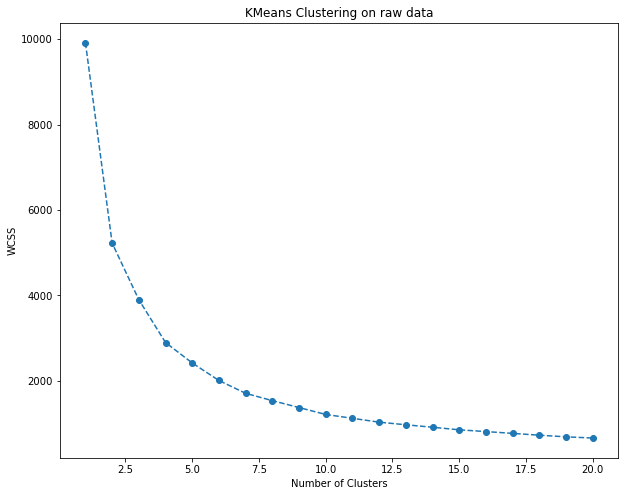

In [8]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.title('KMeans Clustering on raw data')
plt.ylabel('WCSS')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

In [57]:
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2])

In [58]:
df_final_data = pd.concat([df[["gpslat", "gpslon"]], df_useful_data.reset_index(drop=True)], axis=1)

In [59]:
df_final_data["clusters"] = kmeans.labels_

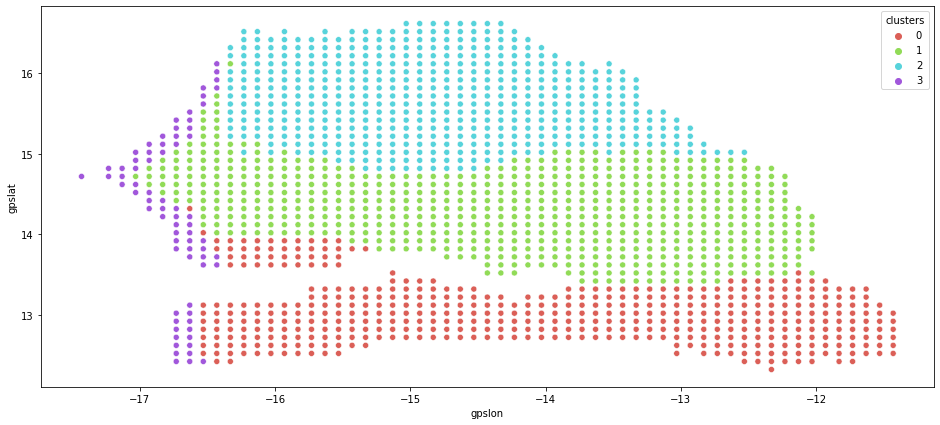

In [60]:
import seaborn as sns

plt.figure(figsize=(16,7))
sns.scatterplot(x=df_final_data["gpslon"], y=df_final_data["gpslat"],hue=df_final_data["clusters"],palette=sns.color_palette("hls",4),
               legend="full")
plt.show()

In [61]:
from shapely.geometry import Point, Polygon
import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
senegal_shapefile = gpd.read_file("../../data/gadm36_SEN_shp/gadm36_SEN_0.shp")

In [63]:
geometry = [Point(xy) for xy in zip(df_final_data["gpslon"], df_final_data["gpslat"])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_final_data, crs=crs, geometry=geometry)

C:\Users\Tanya\anaconda3\envs\omdena-GPSDD\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [64]:
geo_df

,gpslat,gpslon,Extreme intra-period,Mean temperature,Diurnal temperature,Sum rainfall in Jun(mm),Sum rainfall Jun_to_Nov_(mm),rain_coef_of_var,clusters,geometry
0,15.02,-17.030001,18.07,27.173420,5.347186,0.345417,5.464583,5.628123,3,POINT (-17.03000 15.02000)
1,15.02,-16.930000,21.56,27.416781,7.402964,0.420417,6.319167,5.580527,3,POINT (-16.93000 15.02000)
2,15.02,-16.830000,25.53,27.682603,9.520659,0.471250,7.124167,5.696689,3,POINT (-16.83000 15.02000)
3,15.02,-16.730000,28.92,27.929826,11.395868,0.512500,7.846667,5.874703,1,POINT (-16.73000 15.02000)
4,15.02,-16.629999,29.93,28.102682,12.245509,0.510833,8.244583,5.860745,1,POINT (-16.63000 15.02000)
...,...,...,...,...,...,...,...,...,...,...
1648,15.02,-12.930000,29.24,30.435523,12.105299,2.182500,8.517917,6.723689,2,POINT (-12.93000 15.02000)
1649,15.02,-12.830000,29.18,30.544453,12.075689,2.258750,8.229583,6.765548,2,POINT (-12.83000 15.02000)
1650,15.02,-12.730000,29.10,30.654472,12.051048,2.318750,7.916667,6.872024,2,POINT (-12.73000 15.02000)
1651,15.02,-12.630000,28.95,30.769216,12.001078,2.321250,7.531667,6.496414,2,POINT (-12.63000 15.02000)


<AxesSubplot:>

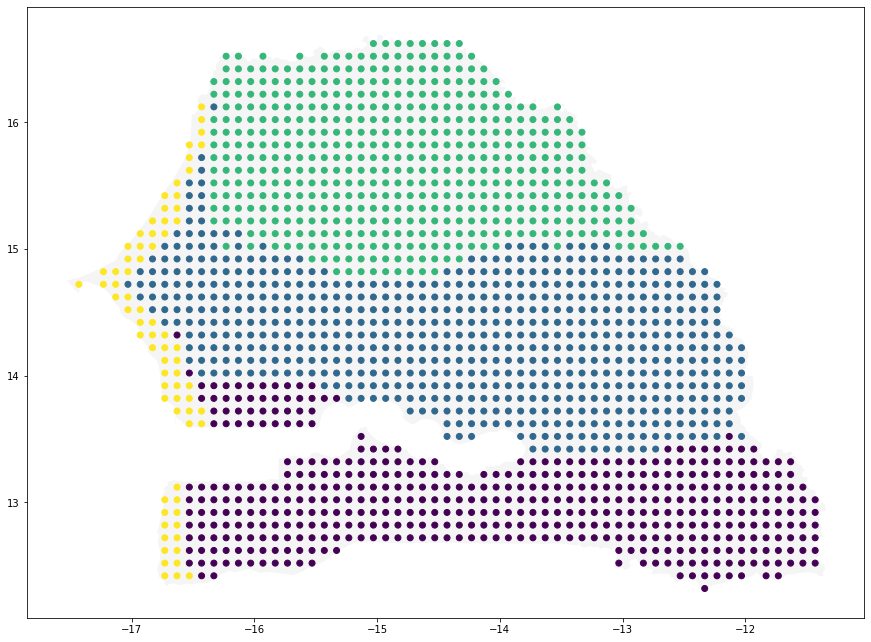

In [65]:
fig, ax = plt.subplots(figsize=(15,15))
senegal_shapefile.plot(ax=ax, color='whitesmoke')
geo_df.plot(ax=ax, c=geo_df["clusters"])


In [67]:
# from sklearn import metrics
# metrics.silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')